# Deep Learning with MNIST

## Loading Dependencies

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt

## Importing Data

In [2]:
raw_train = pd.read_csv('mnist_data/train.csv')
test_X = pd.read_csv('mnist_data/test.csv')

In [3]:
print("Rows in training set:", raw_train.shape[0])
display(raw_train.head())
print("Rows in test set:", test_X.shape[1])
display(test_X.head())

Rows in training set: 42000


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Rows in test set: 784


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
raw_train.groupby('label')[['label']].count()

,label
label,
0,4132
1,4684
2,4177
3,4351
4,4072
5,3795
6,4137
7,4401
8,4063


## Generating a Train-Validation Split for the Dataset

In [5]:
# Here, we first randomly shuffle the data, then use an 80 (training set size) - 20 (test set size) split to create two
# distinct datasets
shuffled = raw_train.sample(frac=1)

split_index = int(.8 * len(shuffled))

# Training set will constitute 80% of the original raw training data
train = raw_train.iloc[:split_index]

# Validation set will constitute the other 20% of the raw training data
val = raw_train.iloc[split_index:]

# Finally, separate the label column from the features for convenience during model training
train_X, train_y = train.iloc[:, train.columns != 'label'].reset_index(drop=True), train['label'].reset_index(drop=True)
val_X, val_y = val.iloc[:, val.columns != 'label'].reset_index(drop=True), val['label'].reset_index(drop=True)

In [6]:
display(train_X.head())
display(train_y.head())
display(val_X.head())
display(val_y.head())

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    0
1    7
2    7
3    2
4    2
Name: label, dtype: int64

## Visualizing the Dataset

Since each row represents a 28 x 28 image flattened into a 1-D array where each pixel value represents the shade of the color of that pixel, we can use functions available in the **matplotlib** package to actually visualize each row as images. Here are a few examples below:

In [73]:
def plot_image(row, shape=(28, 28)):
    array_row = np.array(row)
    reshaped = array_row.reshape(shape)
    plt.imshow(reshaped, cmap="gray")
    plt.show();

Showing image 0 with truth label: 1


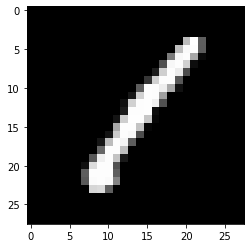

Showing image 1 with truth label: 0


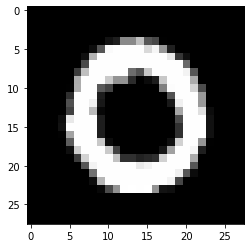

Showing image 2 with truth label: 1


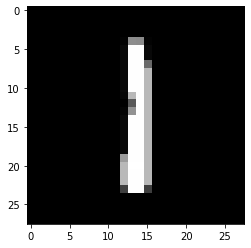

Showing image 3 with truth label: 4


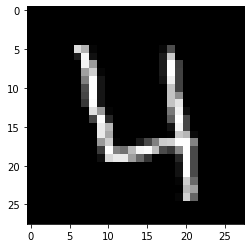

Showing image 4 with truth label: 0


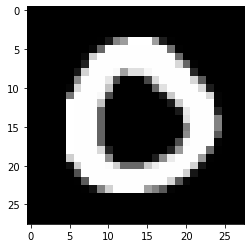

In [74]:
for i in range(5):
    print("Showing image", i, "with truth label:", train_y.iloc[i])
    row = train_X.iloc[i]
    # Reshape the row into a 28 x 28 matrix
    plot_image(row)

## Supervised Learning

In [17]:
def calculate_accuracy(predictions, actual):
    return np.sum(predictions == actual) / len(actual)

### Benchmark Classifier for Comparison: Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', min_samples_split=10)

In [13]:
rf.fit(train_X, train_y)

RandomForestClassifier(criterion='entropy', min_samples_split=10)

In [22]:
rf_train_predictions = rf.predict(train_X)
rf_val_predictions = rf.predict(val_X)

In [23]:
rf_val_predictions

array([0, 7, 7, ..., 7, 6, 9])

In [26]:
calculate_accuracy(rf_val_predictions, val_y)

0.9629761904761904

**Validation Accuracy: 96.3%**

### Misclassification Analysis

In [38]:
rf_mistakes_X = val_X[rf_val_predictions != val_y]
rf_mistakes_y = val_y[rf_val_predictions != val_y]
rf_mistakes_predictions = rf_val_predictions[rf_val_predictions != val_y]

Truth label: 5
Predicted label: 3


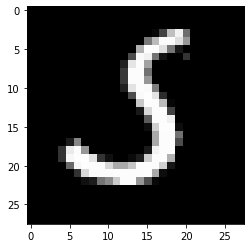

Truth label: 0
Predicted label: 6


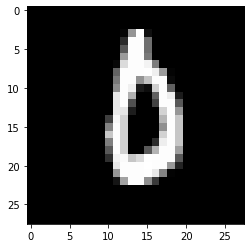

Truth label: 3
Predicted label: 7


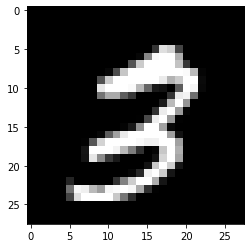

Truth label: 3
Predicted label: 7


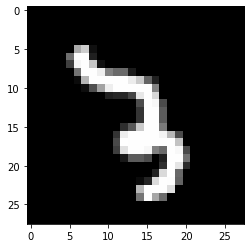

Truth label: 3
Predicted label: 2


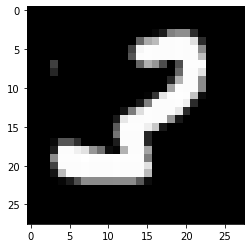

Truth label: 3
Predicted label: 5


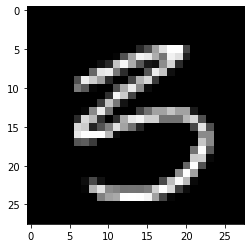

Truth label: 7
Predicted label: 9


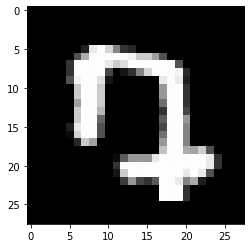

Truth label: 5
Predicted label: 1


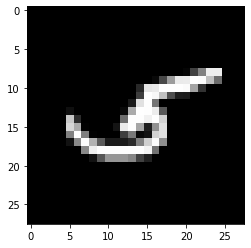

Truth label: 3
Predicted label: 7


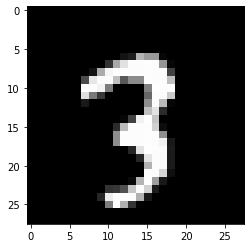

Truth label: 4
Predicted label: 9


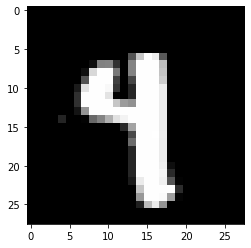

In [75]:
# Plot some images and compare them to predicted results
for i in range(10):
    print("Truth label:", rf_mistakes_y.iloc[i])
    print("Predicted label:", rf_mistakes_predictions[i])
    row = rf_mistakes_X.iloc[i]
    # Reshape the row into a 28 x 28 matrix
    plot_image(row)

### Deep Learning Classifier: Feed-Forward Neural Network

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [58]:
# Neural Network Initialization

ff_model = Sequential([
    Dense(1024, input_dim=train_X.shape[1], activation='relu'),
    Dense(10, activation='softmax')
])

In [59]:
# Compiling the Network

ff_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
# Fitting and Evaluating the Network

ff_model.fit(train_X, train_y, epochs=200, batch_size=20)

Epoch 1/200
1680/1680 [==============================] - 8s 4ms/step - loss: 11.0212 - accuracy: 0.8519
Epoch 2/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.5729 - accuracy: 0.9323
Epoch 3/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.5760 - accuracy: 0.9323
Epoch 4/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.4273 - accuracy: 0.9413
Epoch 5/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.3454 - accuracy: 0.9487
Epoch 6/200
1680/1680 [==============================] - 8s 5ms/step - loss: 0.2975 - accuracy: 0.9505
Epoch 7/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.3052 - accuracy: 0.9532
Epoch 8/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.2444 - accuracy: 0.9601
Epoch 9/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.2655 - accuracy: 0.9554
Epoch 10/200
1680/1680 [==============================] - 7s 4ms/step - 

1680/1680 [==============================] - 7s 4ms/step - loss: 0.0893 - accuracy: 0.9847
Epoch 80/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.1122 - accuracy: 0.9835
Epoch 81/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.1146 - accuracy: 0.9829
Epoch 82/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.1296 - accuracy: 0.9854
Epoch 83/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.0978 - accuracy: 0.9842
Epoch 84/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.0867 - accuracy: 0.9859
Epoch 85/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.1506 - accuracy: 0.9836
Epoch 86/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.1068 - accuracy: 0.9858
Epoch 87/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.1071 - accuracy: 0.9870
Epoch 88/200
1680/1680 [==============================] - 7s 4ms/step - loss:

1680/1680 [==============================] - 8s 5ms/step - loss: 0.0732 - accuracy: 0.9896
Epoch 158/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.0613 - accuracy: 0.9892
Epoch 159/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.0781 - accuracy: 0.9889
Epoch 160/200
1680/1680 [==============================] - 8s 5ms/step - loss: 0.0722 - accuracy: 0.9902
Epoch 161/200
1680/1680 [==============================] - 8s 5ms/step - loss: 0.0583 - accuracy: 0.9903
Epoch 162/200
1680/1680 [==============================] - 8s 5ms/step - loss: 0.0691 - accuracy: 0.9902
Epoch 163/200
1680/1680 [==============================] - 8s 5ms/step - loss: 0.0465 - accuracy: 0.9899
Epoch 164/200
1680/1680 [==============================] - 8s 5ms/step - loss: 0.1094 - accuracy: 0.9899
Epoch 165/200
1680/1680 [==============================] - 7s 4ms/step - loss: 0.0718 - accuracy: 0.9914
Epoch 166/200
1680/1680 [==============================] - 7s 4ms/ste

In [62]:
accuracy = ff_model.evaluate(val_X, val_y)[1]
print("Feed Forward Model Accuracy:", accuracy)

263/263 [==============================] - 0s 1ms/step - loss: 5.8191 - accuracy: 0.9658
Feed Forward Model Accuracy: 0.965833306312561


**Validation Accuracy: 96.6%**

### Deep Learning Classifier: Convolutional Neural Network